In [81]:
#pip install tensorflow==1.
#install if want to run in colab

In [0]:
#import libraries
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout,Activation

In [0]:
# read dataset
df = pd.read_csv("AirPassengers.csv")

In [84]:
#show first five line of dataset
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [0]:
# save Month column as index of time sequence
df.Month = pd.to_datetime(df.Month)
df= df.set_index('Month')

In [86]:
#show dtaframe
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [0]:
#scaling data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scal = MinMaxScaler()
scal.fit(df)
scaled = scal.transform(df)


In [0]:
#from sklearn.model_selection import train_test_split

#train, test =train_test_split(scaled,test_size=0.4, random_state=0)

In [0]:
# split data set into training and testing
train_size = 0.60
train_size = int(len(scaled) * train_size)
test_size = len(scaled) - train_size
train, test = scaled[0:train_size, :], scaled[train_size:len(scaled), :]


In [0]:
window_size = 1
#devide training data into feature and label
data_X, data_Y = [], []
for i in range(len(train) - window_size - 1):
    a = train[i:(i + window_size), 0]
    data_X.append(a)
    data_Y.append(train[i + window_size, 0])




In [0]:

import numpy as np
#convert training data into numpy array
x_train = np.array(data_X)
y_train = np.array(data_Y)

In [0]:
#devide testing data into feature and label
test_X, test_Y = [], []
for i in range(len(test) - window_size - 1):
    a = test[i:(i + window_size), 0]
    test_X.append(a)
    test_Y.append(test[i + window_size, 0])

In [0]:
#convert testing data into numpy array
x_test = np.array(test_X)
y_test = np.array(test_Y)

In [0]:
#reshape data
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [95]:
#define sequential regression model
model = Sequential()
model.add(LSTM(input_shape = (1,window_size), 
               units = 4, 
               return_sequences = True))
model.add(Dropout(0.5))
model.add(LSTM(256))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation("linear"))
model.compile(loss = "mse", 
              optimizer = "adam")
model.summary()
#fir model
model.fit(x_train, y_train, epochs = 100, batch_size = 1, verbose = 2)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 1, 4)              96        
_________________________________________________________________
dropout_9 (Dropout)          (None, 1, 4)              0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 256)               267264    
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 257       
_________________________________________________________________
activation_4 (Activation)    (None, 1)                 0         
Total params: 267,617
Trainable params: 267,617
Non-trainable params: 0
________________________________________________

In [96]:
    import math
    from sklearn.metrics import mean_squared_error
    train_predict = scal.inverse_transform(model2.predict(x_train))
    # Prepare y_train data to also be on the original scale for interpretability.
    d = scal.inverse_transform([y_train])
    #calculat rmse training
    rmse_train = math.sqrt(mean_squared_error(d[0], train_predict[:, 0]))
    print("Training data score: %.2f RMSE" % rmse_train)

Training data score: 24.94 RMSE


In [97]:
    test_predict = scal.inverse_transform(model2.predict(x_test))
    # Prepare y_test data to also be on the original scale for interpretability.
    d = scal.inverse_transform([y_test])
    #calculate #rmse testing
    rmse_test = math.sqrt(mean_squared_error(d[0], test_predict[:, 0]))
    print("Training data score: %.2f RMSE" % rmse_test)

Training data score: 70.77 RMSE


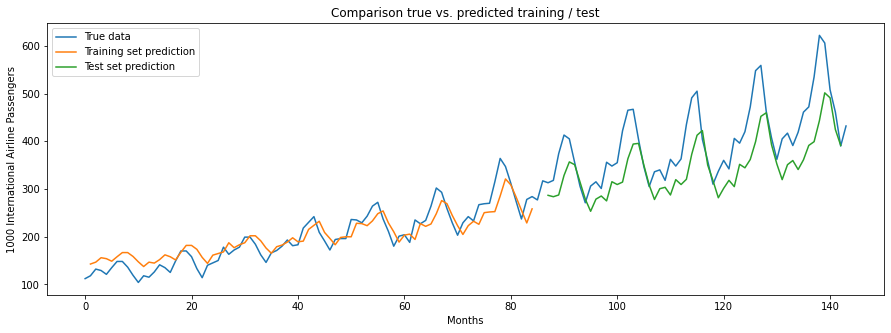

In [98]:
import matplotlib.pyplot as plt

# Start with training predictions.
train_predict_plot = np.empty_like(scaled)
train_predict_plot[:, :] = np.nan
train_predict_plot[window_size:len(train_predict) + window_size, :] = train_predict

# Add test predictions.
test_predict_plot = np.empty_like(scaled)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (window_size * 2) + 1:len(scaled) - 1, :] = test_predict

# Create the plot.
plt.figure(figsize = (15, 5))
plt.plot(scal.inverse_transform(scaled), label = "True data")
plt.plot(train_predict_plot, label = "Training set prediction")
plt.plot(test_predict_plot, label = "Test set prediction")
plt.xlabel("Months")
plt.ylabel("1000 International Airline Passengers")
plt.title("Comparison true vs. predicted training / test")
plt.legend()
plt.show()